# Simulación del Movimiento Armónico Simple (MAS) y movimiento amortiguado con Python

## 1. Movimiento Ármonico Simple

Se desea modelar y graficar el **Movimiento Armónico Simple (MAS)** de un objeto unido a un
resorte ideal, cuya posición en función del tiempo está dada por la ecuación:

𝑥(𝑡) = 𝐴 cos(𝜔𝑡 + 𝜙)

donde:
- 𝐴 es la amplitud inicial del movimiento.
- 𝜔 =√ k/m es la frecuencia angular del oscilador
- k es la constante elástica del resorte.
- m es la masa del objeto.
- 𝑡 es el tiempo en segundos.
- 𝜙 es la fase inicial (para simplicar, tomaremos 𝜙 = 0)

####  Objetivos
1. Implementar una clase en Python que modele el movimiento del oscilador.
2. Generar y graficar la evolución de la posición en función del tiempo.




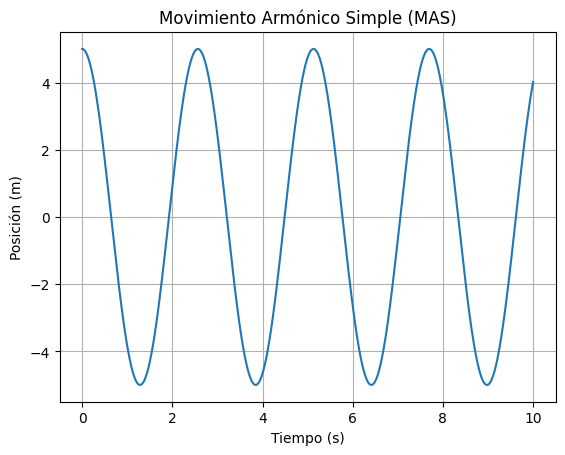

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class Entrada_de_datos:

    def __init__(self):
         try:
            self.A = float(input("Ingresa la amplitud (A): "))
            self.k = float(input("Ingresa la constante del resorte (k): "))
            self.m = float(input("Ingresa la masa (m): "))
            self.phi = 0
         except ValueError:
                print("Por favor, ingresa valores numéricos.")
                exit()

    def Calcular_posicion(self, t):
        frecuencia_Angular = np.sqrt(self.k/self.m)
        return self.A * np.cos(frecuencia_Angular * t + self.phi)

class Grafico(Entrada_de_datos):

    data = Entrada_de_datos()
    t = np.linspace(0, 10, 1000)
    x = data.Calcular_posicion(t)
    plt.plot(t, x)
    plt.title("Movimiento Armónico Simple (MAS)")
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (m)')
    plt.grid(True)
    plt.show()


## 2. Movimiento Amortiguado

Hasta ahora, hemos considerado un sistema oscilando sin pérdida de energía. Sin embargo, en la realidad, los sistemas mecánicos suelen experimentar amortiguamiento, lo que signica que la amplitud de la oscilación disminuye con el tiempo debido a fuerzas disipativas como la fricción o la resistencia del aire.

El Movimiento Armónico Amortiguado está descrito por la ecuación:

𝑥(𝑡) = 𝐴𝑒−𝛾t cos(𝜔′ 𝑡)

donde:
- 𝐴 es la amplitud inicial.
- 𝛾 es el coeciente de amortiguamiento (determina qué tan rápido disminuye la amplitud).
- 𝜔′ es la nueva frecuencia angular, dada por:
-   𝜔′= √𝑘/𝑚-𝛾2


##### Objetivos

1. Extender la clase denfida en el ejercicio anterior:
    - Agregar el coeciente de amortiguamiento 𝛾.
    - Agregar un método para el cálculo de la posición para incluir el término 𝑒−𝛾t

2. Comparar grácamente el movimiento con y sin amortiguamiento:
    - Realizar dos simulaciones con los mismos valores de 𝐴,𝑘 y 𝑚, pero con 𝛾=0 y 𝛾 > 0
    - Observar cómo la oscilación se atenúa con el tiempo en el caso amortiguado.






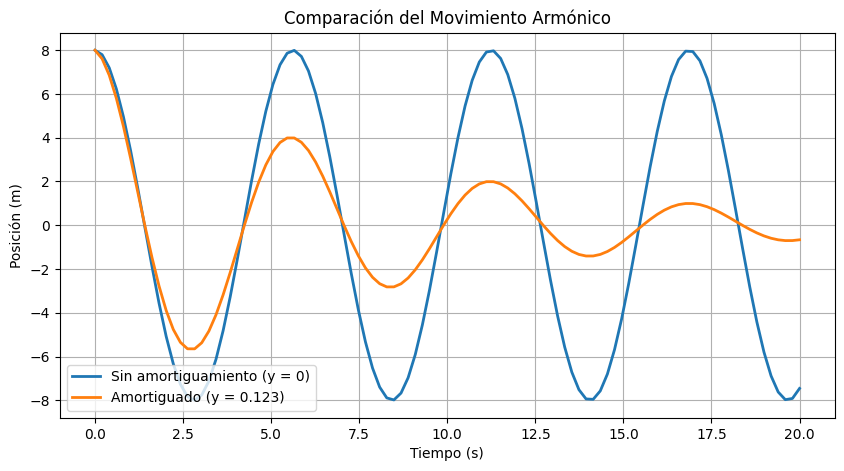

In [133]:
import matplotlib.pyplot as plt
import numpy as np

class Preparacion_datos(Entrada_de_datos):

    def __init__(self ,y=0.0):
        super().__init__()
        self.y = y
        self.omega0 = np.sqrt(self.k / self.m)

        if self.y**2 <= self.k/self.m:
            self.omega = np.sqrt((self.k / self.m) - self.y**2)
        else:
            raise ValueError("El valor de gamma es demasiado grande: se requiere que k/m >= y^2.")

    def calcular_Frecuencia_Angular(self):
        if self.y == 0:
            return self.omega0
        else:
            return self.omega

    def calculo_posicion(self, t):
        if self.y == 0:
            return self.A * np.cos(self.omega0 * t + self.phi)
        else:
            return self.A * np.exp(-self.y * t) * np.cos(self.omega * t + self.phi)


def graficar_movimientos():

    t = np.linspace(0, 20, 100)
    oscilador_sin_amort = Preparacion_datos(y=0.0)
    x_sin_amort = oscilador_sin_amort.calculo_posicion(t)

    # Luego, se solicita el coeficiente de amortiguamiento para el siguiente caso
    while True:
        try:
            y_input = float(input("Ingresa el coeficiente de amortiguamiento (y > 0): "))
            if y_input > 0:
                break
            else:
                print("Por favor, ingresa un valor mayor que 0.")
        except ValueError:
            print("Valor inválido. Ingresa un número.")

    A, k, m, phi = oscilador_sin_amort.A, oscilador_sin_amort.k, oscilador_sin_amort.m, oscilador_sin_amort.phi
    oscilador_amort = OsciladorConDatos(A, k, m, phi, y=y_input)
    x_amort = oscilador_amort.calculo_posicion(t)

    # Graficar ambos movimientos
    plt.figure(figsize=(10, 5))
    plt.plot(t, x_sin_amort, label="Sin amortiguamiento (y = 0)", lw=2)
    plt.plot(t, x_amort, label=f"Amortiguado (y = {y_input})", lw=2)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (m)")
    plt.title("Comparación del Movimiento Armónico")
    plt.legend()
    plt.grid(True)
    plt.show()

# Clase auxiliar para evitar volver a pedir datos en el constructor ya que no pude hacer que se pase solo una vez los valores
# para ambos osciladores, se que rebundante pero no consegui hacerlo que solo pidiera los datos una sola vez.
# pero funciona :D

class OsciladorConDatos(Preparacion_datos):
    def __init__(self, A, k, m, phi, y=0.0):
        self.A = A
        self.k = k
        self.m = m
        self.phi = phi
        self.y = y

        self.omega0 = np.sqrt(self.k / self.m)
        if self.y**2 <= self.k / self.m:
            self.omega = np.sqrt((self.k / self.m) - self.y ** 2)
        else:
            raise ValueError("El valor de y es demasiado grande: se requiere que k/m >= y^2.")

if __name__ == '__main__':
    graficar_movimientos()
